<span style="font-size:3.5em;">Linear Regression Model for HGTV Show</span>

# Buiness Problem 
--- 

One of HGTV Network's couples is moving to KingS Country and HGTV does not want to lose them.  Instead of letting them go HGTV will be using the King county's data set to figure out what type of show would fit with the couple's new areas. The most important indicator is cost since that will be use to determine the budget. 

# Data Mining - Uploading and Reviewing Data 
--- 

## Importing 

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline

In [147]:
df = pd.read_csv('./Cloned-folder/dsc-phase-2-project/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Cleaning/ Exploration

## Functions Used

In [148]:
#Convert datatype to INT
def convert_int(df, col):
    df[col] = df[col].astype(str).astype(int)
    return df.info()

In [149]:
#Convert datatype to FLOAT
def convert_float(df, col):
    df[col] = df[col].astype(str).astype(float)

In [150]:
#Convert datatype to DATE
def convert_date(df, col):
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [151]:
#converting Null falues to 0 
def convert_nan_to_0(col):
    #df['view'].fillna(0.0)

    df[col].fillna(0.0, inplace=True)
    return df.info()

## Column Names and Descriptions for Kings County Data Set

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Removing date from day from date during the converting because filming for any show would be continous and trying to fit a show around a few days in a single month would not be fesiable with productivity. As shown below it is having the day does not contribute addition infomation, the dip in houses sold would be just as evident if only month and year was used.  Putting the data in to a histogram is an option it would also not beheltful becuase the information would not be seprated by month(which has unequal days moth to month. 

In [153]:
convert_date(df, 'date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [154]:
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [155]:
df_date = df.sort_values(['date'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

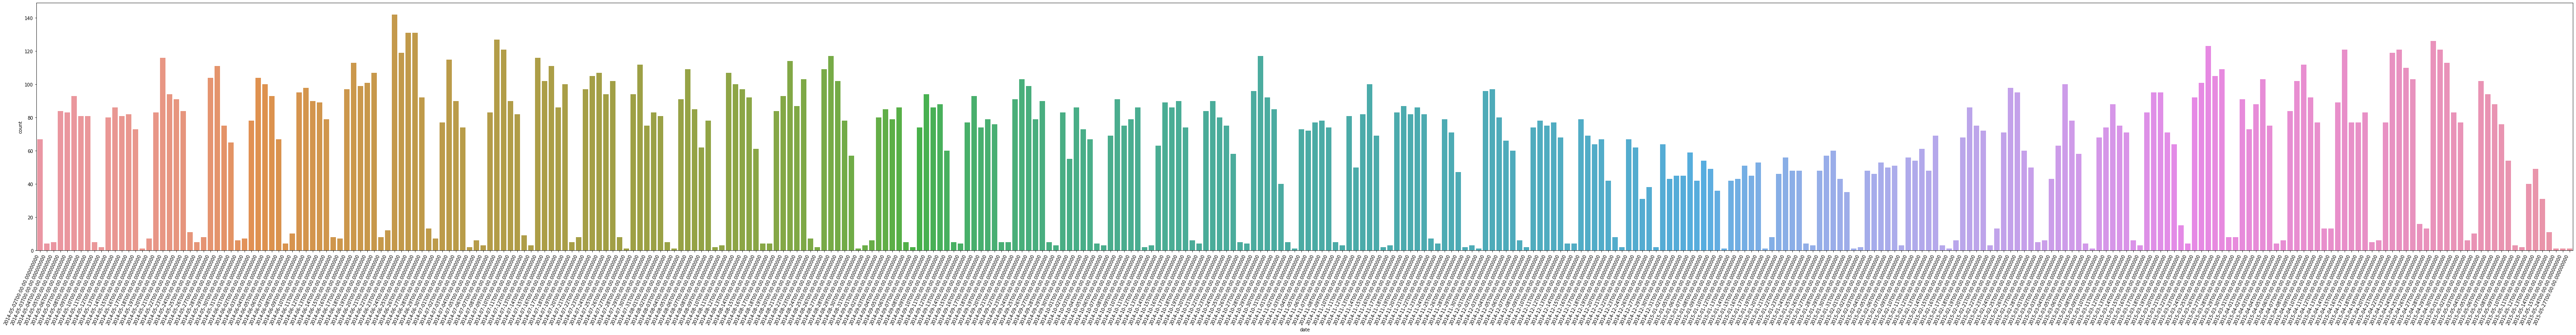

In [156]:
fig, ax = plt.subplots(figsize=(100,10))
sns.countplot(x ='date', ax = ax, data = df_date)
plt.xticks(rotation=65, horizontalalignment='right')


Interesting findings
- Very few houses get closed on the weekend, at the same time closing date is arbitary since there is so much that goes on in order to close a house.
- There is a fluxuation of number of homes sold theought out these 2 years. shouls group by month to see if there is any futher trends 
- The range og the data is from 05-2014 to 05-2015

In [157]:
df['month_year'] = pd.to_datetime(df_date['date']).dt.strftime('%Y%m')
df_date['month'] = pd.to_datetime(df_date['date']).dt.strftime('%Y-%m')
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2014-05'),
  Text(1, 0, '2014-06'),
  Text(2, 0, '2014-07'),
  Text(3, 0, '2014-08'),
  Text(4, 0, '2014-09'),
  Text(5, 0, '2014-10'),
  Text(6, 0, '2014-11'),
  Text(7, 0, '2014-12'),
  Text(8, 0, '2015-01'),
  Text(9, 0, '2015-02'),
  Text(10, 0, '2015-03'),
  Text(11, 0, '2015-04'),
  Text(12, 0, '2015-05')])

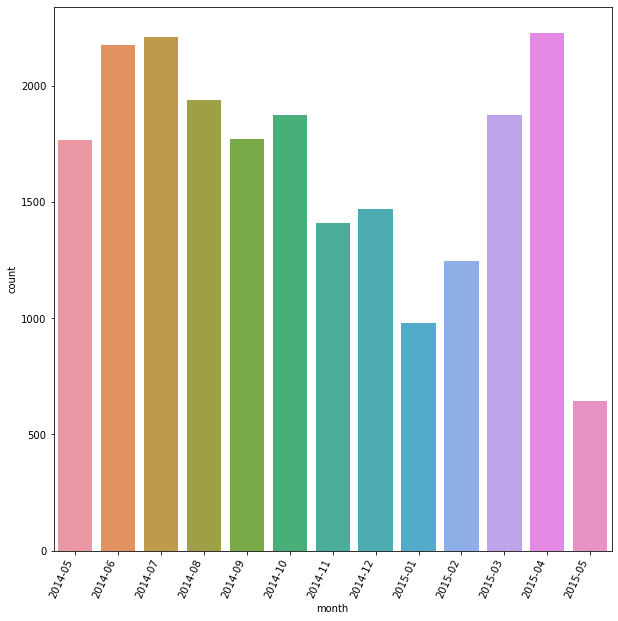

In [158]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x ='month', ax = ax, data = df_date)

plt.xticks(rotation=65, horizontalalignment='right')

- It look like as the months move closer to the summer time there are  more homes being sold. 
- It looke like the lost month had a surprising low amount of houses sold for it to be the summer but that could be the result of incomplete data, since the time between when people close on there home and when that information is public has a time gap.
- should in investigate next if time of year had an effect on price. 

In [159]:
dff = df[['price', 'date']].sort_values('date')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2014-05'),
  Text(1, 0, '2014-06'),
  Text(2, 0, '2014-07'),
  Text(3, 0, '2014-08'),
  Text(4, 0, '2014-09'),
  Text(5, 0, '2014-10'),
  Text(6, 0, '2014-11'),
  Text(7, 0, '2014-12'),
  Text(8, 0, '2015-01'),
  Text(9, 0, '2015-02'),
  Text(10, 0, '2015-03'),
  Text(11, 0, '2015-04'),
  Text(12, 0, '2015-05')])

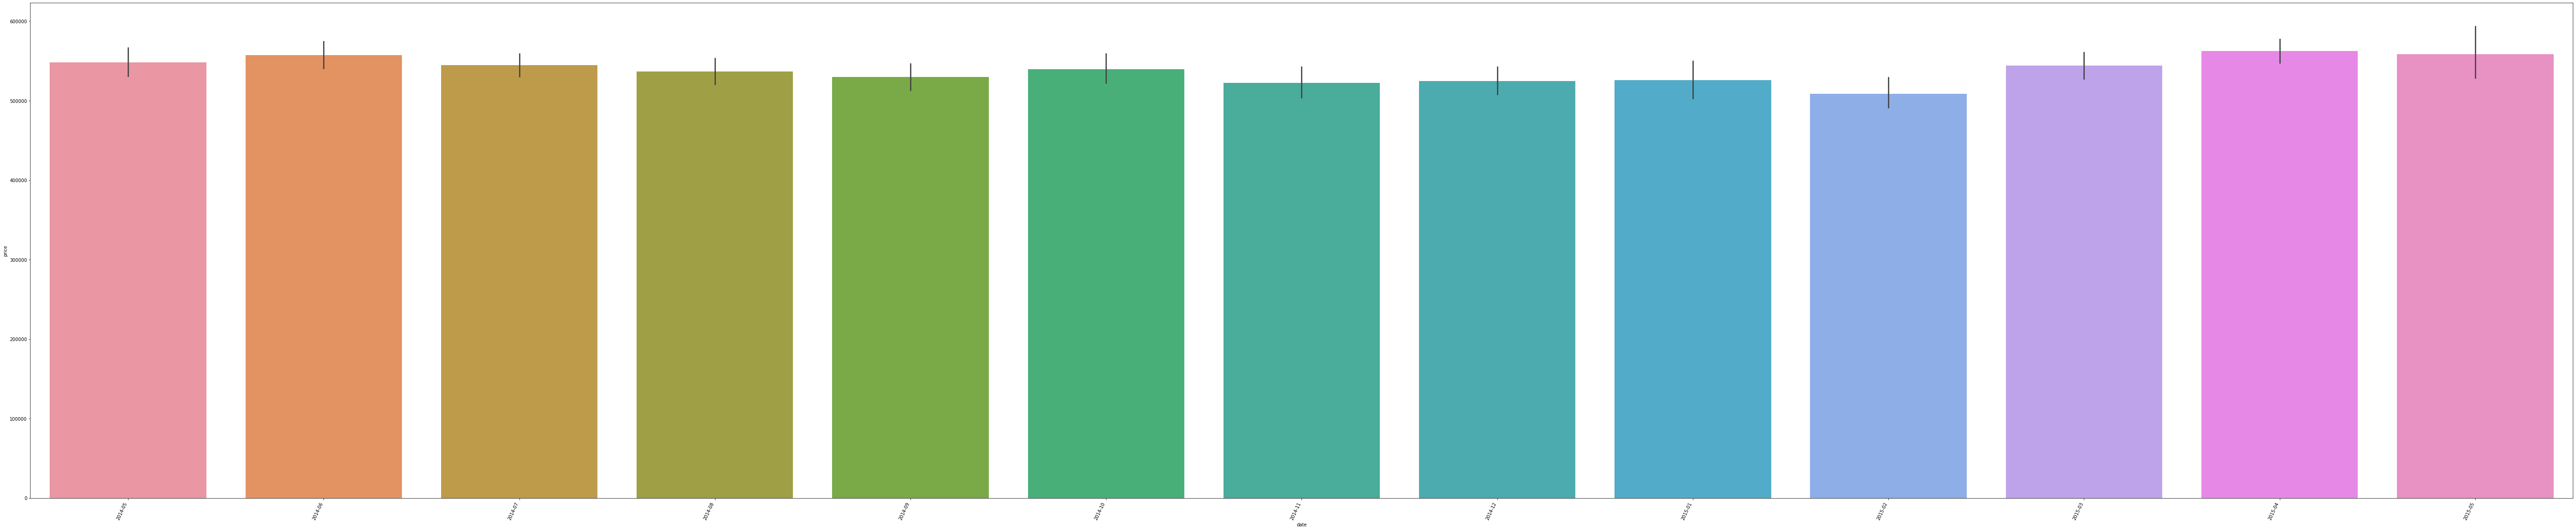

In [160]:
figure, ax= plt.subplots(figsize = (100,20))
sns.barplot(x = 'date', y = 'price', data = dff)
plt.xticks(rotation=65, horizontalalignment='right')

<AxesSubplot:xlabel='month', ylabel='price'>

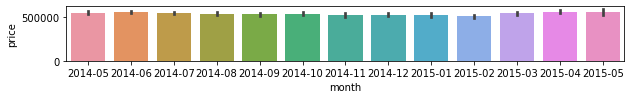

In [161]:
figure, ax= plt.subplots(figsize = (10,1))
sns.barplot(x = 'month', y = 'price', data = df_date)

- The above graph shows that homes sell for slightly more in the summer months.  Note there was a peek in October which is a result of the home(s) sold on October 11, 2014 which totaled about 2 million dollars. 
- Since the month_year column is a good representiation of homes sold over time the date column is redundant and will be droped.

In [162]:
df = df.drop('date', axis = 1)


In [163]:
convert_int(df, 'month_year')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [164]:
df['sqft_basement'].replace(to_replace =["?"], value ="0", inplace=True)
#df[['sqft_basement']].value_counts(ascending=False)

In [165]:
df[['sqft_basement']].value_counts(ascending=False)


sqft_basement
0.0              12826
0                  454
600.0              217
500.0              209
700.0              208
                 ...  
225.0                1
2240.0               1
2196.0               1
2190.0               1
2180.0               1
Length: 304, dtype: int64

In [166]:
convert_float(df, 'sqft_basement')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [167]:
df_sqft = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
df_sqft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_above     21597 non-null  int64  
 3   sqft_basement  21597 non-null  float64
 4   sqft_living15  21597 non-null  int64  
 5   sqft_lot15     21597 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1012.5 KB


In [168]:
df_sqft['base_above'] = df_sqft['sqft_above'] + df_sqft['sqft_basement']
df_sqft[['sqft_living', 'base_above']]

<ipython-input-168-701d7f16f4a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqft['base_above'] = df_sqft['sqft_above'] + df_sqft['sqft_basement']


,sqft_living,base_above
0,1180,1180.0
1,2570,2570.0
2,770,770.0
3,1960,1960.0
4,1680,1680.0
...,...,...
21592,1530,1530.0
21593,2310,2310.0
21594,1020,1020.0
21595,1600,1600.0


<AxesSubplot:xlabel='sqft_living', ylabel='base_above'>

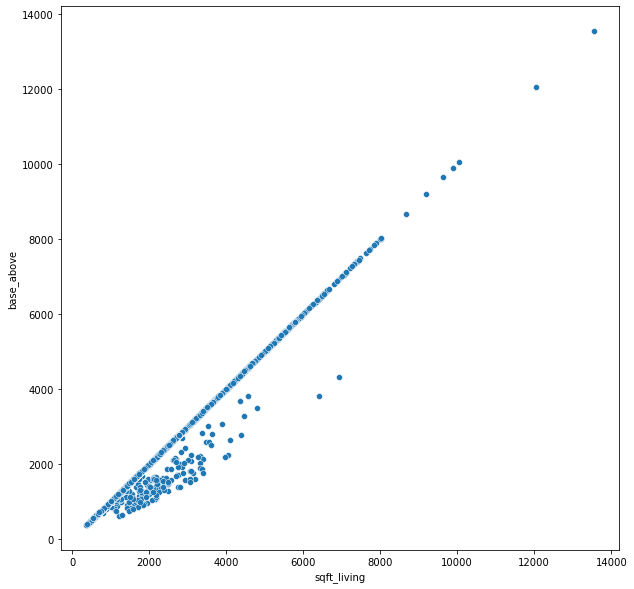

In [169]:
figure, ax= plt.subplots(figsize = (10,10))
sns.scatterplot( x = 'sqft_living', y = 'base_above' , data = df_sqft)

from the chart and from the graph it shows that sqft_above and sqft_basement add together to equal sqft living.  The ones that are below the line are the homes that didnt have sqft_basment listed.  From here sqft_basement can be recalculated to the correct values by subtracting sqft_above from sdft_living. 

In [170]:
df['new_sqft_basement'] = df['sqft_living'] - df['sqft_above']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   waterfront         19221 non-null  float64
 8   view               21534 non-null  float64
 9   condition          21597 non-null  int64  
 10  grade              21597 non-null  int64  
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  float64
 13  yr_built           21597 non-null  int64  
 14  yr_renovated       17755 non-null  float64
 15  zipcode            21597 non-null  int64  
 16  lat                215

In [171]:
df_sqft = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'new_sqft_basement']]

In [172]:
df_sqft['new_base_above'] = df_sqft['sqft_above'] + df_sqft['new_sqft_basement']

<ipython-input-172-8178a0893752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sqft['new_base_above'] = df_sqft['sqft_above'] + df_sqft['new_sqft_basement']


<AxesSubplot:xlabel='sqft_living', ylabel='new_base_above'>

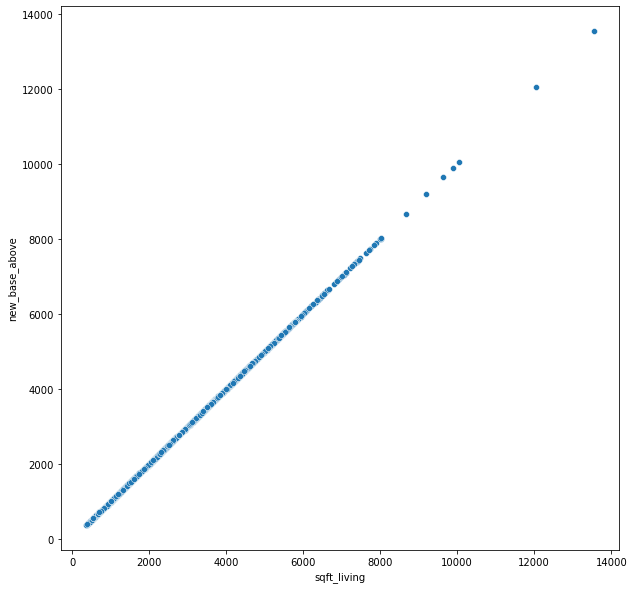

In [173]:
figure, ax= plt.subplots(figsize = (10,10))
sns.scatterplot( x = 'sqft_living' , y ='new_base_above' , data = df_sqft)

In [174]:
abs = df[['id', 'price']]

<AxesSubplot:xlabel='price', ylabel='Count'>

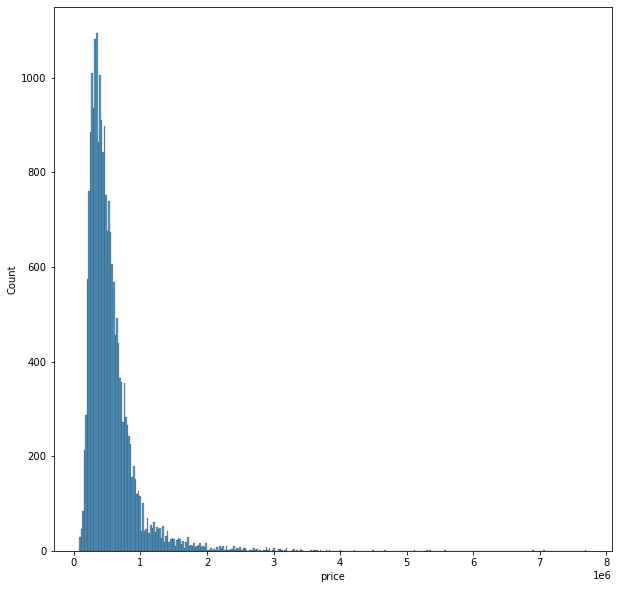

In [175]:
figure, ax= plt.subplots(figsize = (10,10))
sns.histplot(data = df, x = df['price'])

sqft living can now be droped since is already represent with sqft_above and sqft_basemant. 

In [176]:
df = df.drop('sqft_living', axis = 1)

In [177]:
df = df.drop('sqft_basement', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_lot           21597 non-null  int64  
 5   floors             21597 non-null  float64
 6   waterfront         19221 non-null  float64
 7   view               21534 non-null  float64
 8   condition          21597 non-null  int64  
 9   grade              21597 non-null  int64  
 10  sqft_above         21597 non-null  int64  
 11  yr_built           21597 non-null  int64  
 12  yr_renovated       17755 non-null  float64
 13  zipcode            21597 non-null  int64  
 14  lat                21597 non-null  float64
 15  long               21597 non-null  float64
 16  sqft_living15      215

<AxesSubplot:xlabel='yr_built', ylabel='price'>

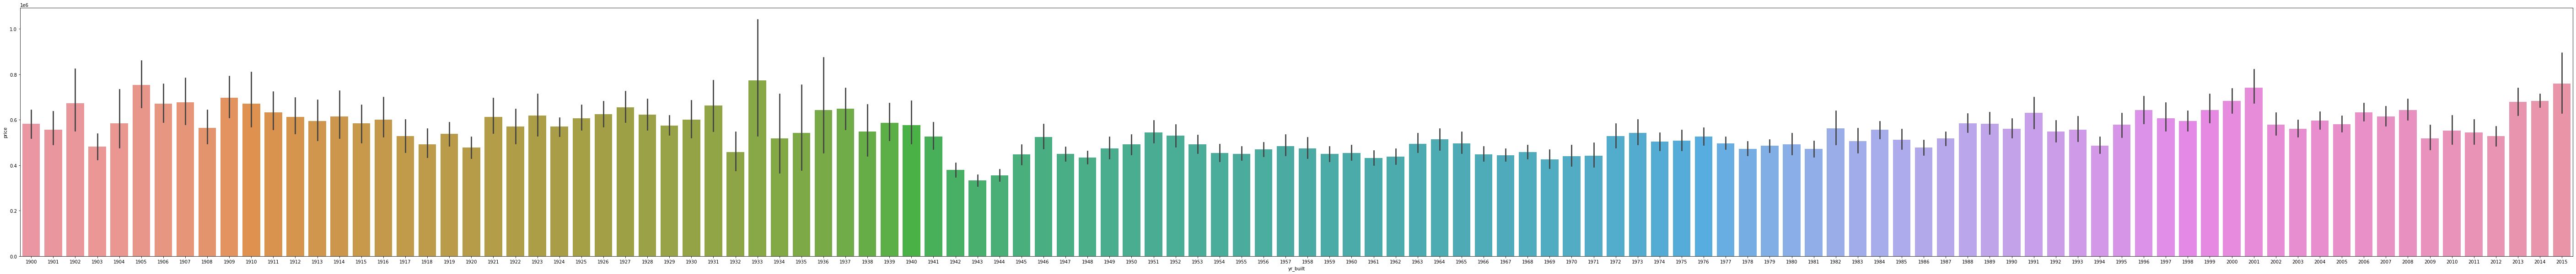

In [178]:

figure, ax= plt.subplots(figsize = (100,10))
sns.barplot( x = df['yr_built'] , y ='price' , data = df )



In [179]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,201438.870121,291.725008
std,2.876736e+09,3.673681e+05,0.926299,0.768984,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,44.367354,442.667800
min,1.000102e+06,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,201405.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,201407.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,201410.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,201502.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,201505.000000,4820.000000


In [180]:
257/21597

0.011899800898272908

In [181]:
df_count = df.loc[df['yr_renovated'] > 2004]
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 103 to 20946
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 265 non-null    int64  
 1   price              265 non-null    float64
 2   bedrooms           265 non-null    int64  
 3   bathrooms          265 non-null    float64
 4   sqft_lot           265 non-null    int64  
 5   floors             265 non-null    float64
 6   waterfront         237 non-null    float64
 7   view               265 non-null    float64
 8   condition          265 non-null    int64  
 9   grade              265 non-null    int64  
 10  sqft_above         265 non-null    int64  
 11  yr_built           265 non-null    int64  
 12  yr_renovated       265 non-null    float64
 13  zipcode            265 non-null    int64  
 14  lat                265 non-null    float64
 15  long               265 non-null    float64
 16  sqft_living15      265

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

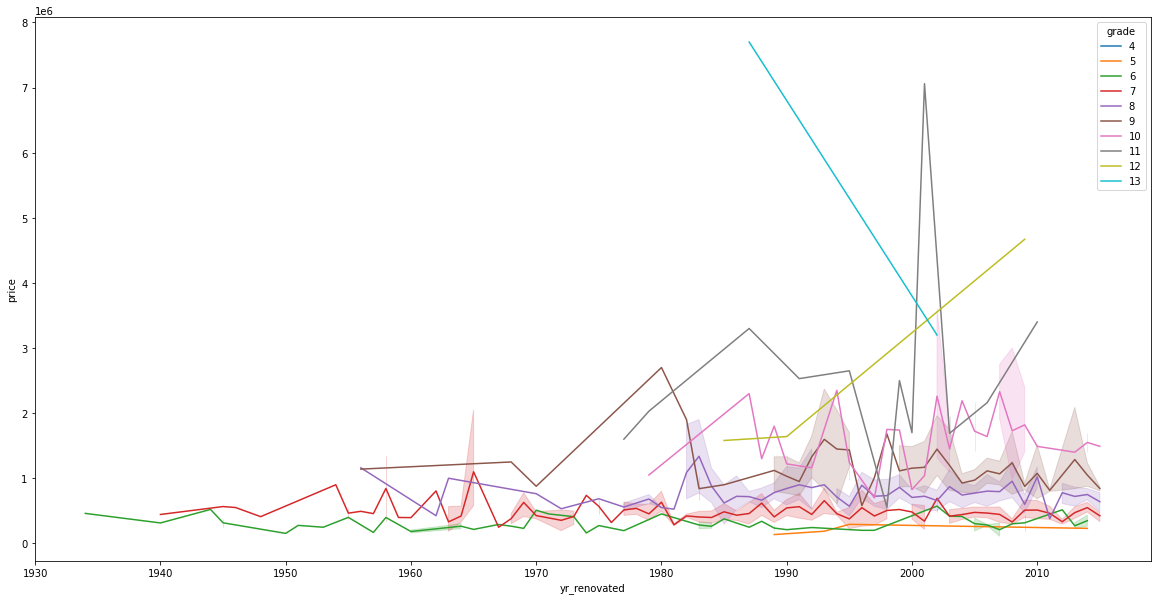

In [182]:
df1 = df.loc[df['yr_renovated'] > 1]
figure, ax= plt.subplots(figsize = (20,10))
sns.lineplot( x = 'yr_renovated', y ='price' , hue='grade', legend=True, 
                palette="tab10",  data = df1 )

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

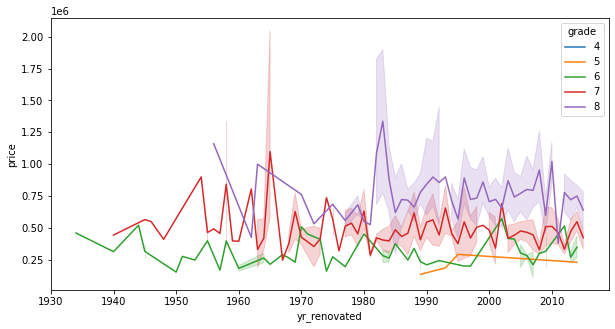

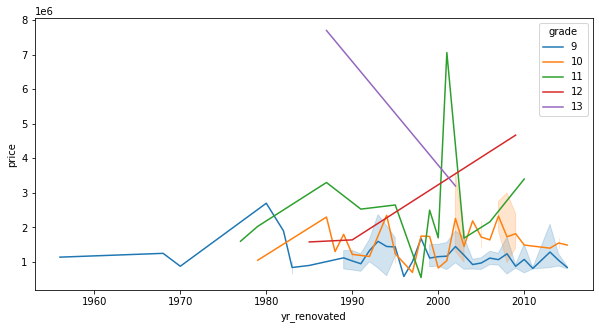

In [183]:
df1 = df.loc[df['yr_renovated'] > 1]
df_grade_under_nine = df1.loc[df1['grade'] < 9]
figure, ax= plt.subplots(figsize = (10, 5))
sns.lineplot( x = 'yr_renovated', y ='price' , hue='grade', legend=True, 
                palette="tab10",  data = df_grade_under_nine )
df1_2 = df.loc[df['yr_renovated'] > 1]
df_grade_under_nine_2 = df1_2.loc[df1_2['grade'] > 8]
figure, ax= plt.subplots(figsize = (10,5))
sns.lineplot( x = 'yr_renovated', y ='price' , hue='grade', legend=True, 
                palette="tab10",  data = df_grade_under_nine_2 )

In [184]:
ddd = df.loc[df['grade'] == 9]
print(ddd)

               id      price  bedrooms  bathrooms  sqft_lot  floors  \
15     9297300055   650000.0         4       3.00      5000     2.0   
21     2524049179  2000000.0         3       2.75     44867     1.0   
40     5547700270   625000.0         4       2.50      5520     2.0   
42     7203220400   861990.0         5       2.75      5639     2.0   
47     4178300310   785000.0         4       2.50     13416     2.0   
...           ...        ...       ...        ...       ...     ...   
21580  7502800100   679950.0         5       2.75      9437     2.0   
21582  8956200760   541800.0         4       2.50      7866     2.0   
21583  7202300110   810000.0         4       3.00      7838     2.0   
21589  3448900210   610685.0         4       2.50      6023     2.0   
21590  7936000429  1010000.0         4       3.50      7200     2.0   

       waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
15            0.0   3.0          3      9        1980      1979   

<AxesSubplot:xlabel='grade', ylabel='price'>

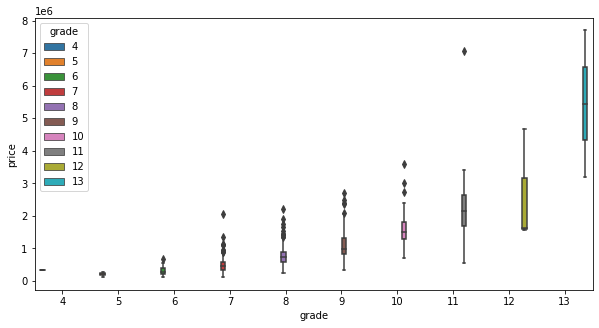

In [185]:
df1 = df.loc[df['yr_renovated'] > 1]
df_grade_under_nine = df1.loc[df1['grade'] < 14]
figure, ax= plt.subplots(figsize = (10, 5))
sns.boxplot( x = 'grade', y ='price' , hue='grade', 
                palette="tab10",  data = df_grade_under_nine )


In [186]:
df_columns = ddd.columns
for i in df_columns:
    print('\033[1m' + i.upper() + '\033[0m')
    print(ddd[[i]].value_counts(ascending=False))
    print('___________________________________________________')

ID
id        
7504021310    2
9809000020    2
2619920170    2
7853420110    2
7853400250    2
             ..
6635000110    1
6632300567    1
6613000750    1
6613000715    1
5200087       1
Length: 2606, dtype: int64
___________________________________________________
PRICE
price   
650000.0    25
850000.0    25
775000.0    22
600000.0    22
700000.0    22
            ..
732500.0     1
732350.0     1
731781.0     1
731688.0     1
230000.0     1
Length: 990, dtype: int64
___________________________________________________
BEDROOMS
bedrooms
4           1351
3            832
5            313
2             78
6             33
7              4
1              2
10             1
8              1
dtype: int64
___________________________________________________
BATHROOMS
bathrooms
2.50         1226
2.75          286
2.25          237
3.50          223
3.25          182
3.00          161
2.00           93
1.75           92
3.75           34
1.50           23
4.00           22
4.50           15
4

Text(0, 0.5, 'Cost (in millions)')

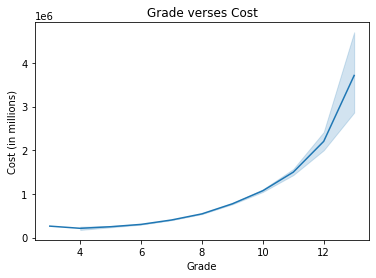

In [187]:
sns.lineplot( x = 'grade', y ='price' , legend=True, 
                palette="deep",  data = df )
plt.title('Grade verses Cost')
plt.xlabel('Grade')
plt.ylabel('Cost (in millions)')

from the above line graph it looks like rennovating homes to a certain level will have result in a higher sell price.  you can also see the graph's price takes off at around the grade 8 mark 

In [188]:
grade1 = df.loc[(df["grade"] <= 8)]
grade1[['price']].describe()

,price
count,1.734700e+04
mean,4.373974e+05
std,1.958205e+05
min,7.800000e+04
25%,2.990000e+05
50%,4.015000e+05
75%,5.390000e+05
max,3.070000e+06


<AxesSubplot:xlabel='grade', ylabel='price'>

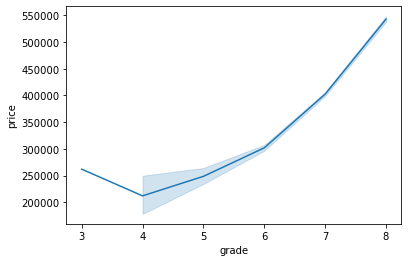

In [189]:
sns.lineplot( x = 'grade', y ='price' , legend=True, 
                palette="deep",  data = grade1 )

In [190]:
grade2 = df.loc[(df["grade"] > 8)]
grade2[['price']].describe()

,price
count,4.250000e+03
mean,9.602945e+05
std,5.565400e+05
min,2.300000e+05
25%,6.423508e+05
50%,8.100000e+05
75%,1.100000e+06
max,7.700000e+06


<AxesSubplot:xlabel='grade', ylabel='price'>

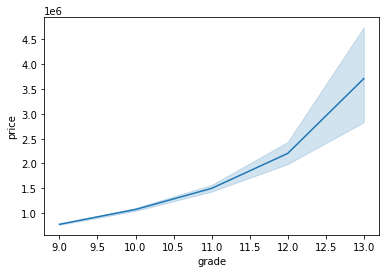

In [191]:
sns.lineplot( x = 'grade', y ='price' , legend=True, 
                palette="deep",  data = grade2 )

In [192]:
# df1 = df.loc[df['yr_renovated'] > 1 ]
# figure, ax= plt.subplots(figsize = (20,10))
# sns.scatterplot( x = 'bedrooms', y ='bathrooms' , hue='grade', palette= "deep", data = df1, 
#                     size="grade", sizes=(20, 1000))

In [193]:
#

In [194]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

The mean of bed rooms is between 3 and 4 room with a STD of less than one.  Also a home have 33 roomes seems very unlikely

In [195]:
df.loc[df['bedrooms'] == 33]

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
15856,2402100895,640000.0,33,1.75,6000,1.0,0.0,0.0,5,7,1040,1947,0.0,98103,47.6878,-122.331,1330,4700,201406,580


For a home to have 33 rooms with 1620 sqsf of living space gives about 49 sqsf of space per room and 1 shower does not make since as a home wo that value will bedroped 

In [196]:
df = df.loc[(df["bedrooms"] < 33)]
#df = df.drop(['bedrooms'] == 33, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21596 non-null  int64  
 1   price              21596 non-null  float64
 2   bedrooms           21596 non-null  int64  
 3   bathrooms          21596 non-null  float64
 4   sqft_lot           21596 non-null  int64  
 5   floors             21596 non-null  float64
 6   waterfront         19220 non-null  float64
 7   view               21533 non-null  float64
 8   condition          21596 non-null  int64  
 9   grade              21596 non-null  int64  
 10  sqft_above         21596 non-null  int64  
 11  yr_built           21596 non-null  int64  
 12  yr_renovated       17754 non-null  float64
 13  zipcode            21596 non-null  int64  
 14  lat                21596 non-null  float64
 15  long               21596 non-null  float64
 16  sqft_living15      215

we are not looking for mansion style homes how homes with 6 or more homes will be droped 

In [197]:
df = df.loc[(df["bedrooms"] < 6)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         18937 non-null  float64
 7   view               21202 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       17473 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

<AxesSubplot:xlabel='yr_built', ylabel='price'>

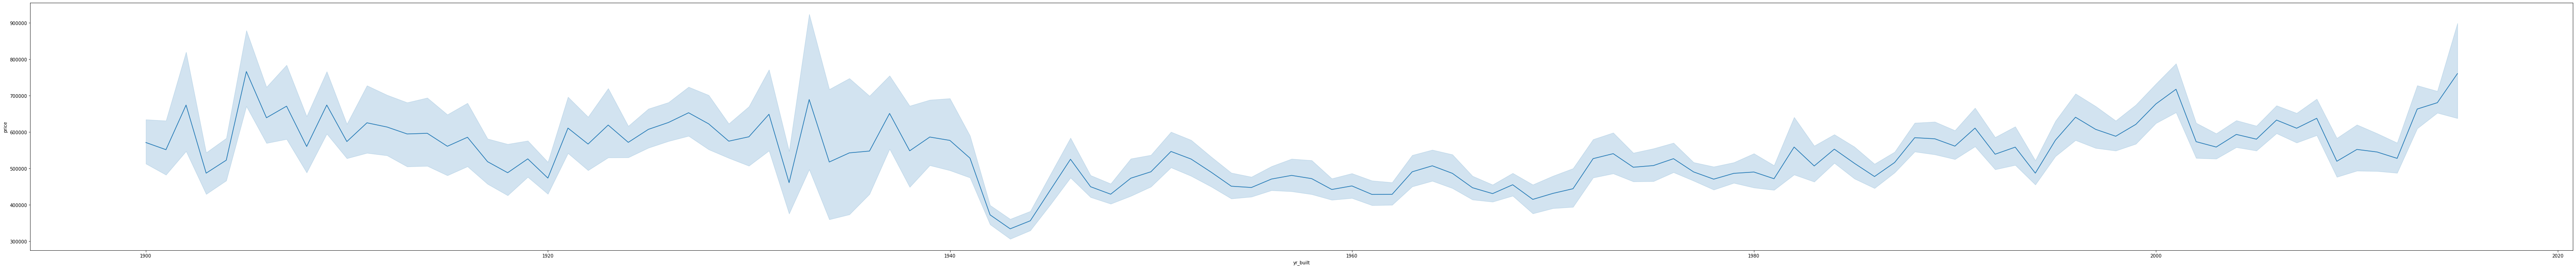

In [198]:
figure, ax= plt.subplots(figsize = (100,10))
sns.lineplot( x = df['yr_built'] , y ='price' , data = df )


In [199]:
df.loc[(df["price"] >3000000)]

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
300,3225069065,3080000.0,4,5.00,18641,1.0,1.0,4.0,3,10,2600,2002,0.0,98074,47.6053,-122.077,4550,19508,201406,1950
656,3760500116,3070000.0,3,2.50,55867,1.0,1.0,4.0,4,8,2330,1957,0.0,98034,47.7022,-122.224,2730,26324,201411,1600
1162,1247600105,5110000.0,5,5.25,45517,2.0,1.0,4.0,3,12,5990,1999,0.0,98033,47.6767,-122.211,3430,26788,201410,2020
1446,8907500070,5350000.0,5,5.00,23985,2.0,0.0,4.0,3,12,6720,2009,0.0,98004,47.6232,-122.220,4600,21750,201504,1280
2083,8106100105,3850000.0,4,4.25,21300,2.0,1.0,4.0,4,11,5770,1980,0.0,98040,47.5850,-122.222,4620,22748,201411,0
2442,7524900003,3280000.0,2,1.75,10000,2.5,1.0,4.0,3,11,4350,2001,0.0,98008,47.6042,-122.112,3120,12300,201412,2490
2624,7738500731,4500000.0,5,5.50,40014,2.0,1.0,4.0,3,12,6350,2004,0.0,98155,47.7493,-122.280,3030,23408,201408,290
2862,4114601570,3600000.0,3,3.25,12431,2.0,1.0,4.0,3,10,3420,1941,2002.0,98144,47.5925,-122.287,3680,12620,201411,1600
3910,9808700762,7060000.0,5,4.50,37325,2.0,1.0,2.0,3,11,7680,1940,2001.0,98004,47.6500,-122.214,3930,25449,201406,2360
4145,6447300265,4000000.0,4,5.50,16573,2.0,0.0,0.0,3,12,5760,2008,0.0,98039,47.6151,-122.224,3140,15996,201410,1320


In [200]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month_year', 'new_sqft_basement'],
      dtype='object')

In [201]:
df_columns = df.columns
for i in df_columns:
    print('\033[1m' + i.upper() + '\033[0m')
    print(df[[i]].value_counts(ascending=False))
    print('___________________________________________________')

ID
id        
795000620     3
726049190     2
1901600090    2
9809000020    2
3598600049    2
             ..
6306810110    1
6308000020    1
6321000045    1
6324000090    1
1200019       1
Length: 21093, dtype: int64
___________________________________________________
PRICE
price   
350000.0    170
450000.0    168
550000.0    157
500000.0    152
425000.0    150
           ... 
529888.0      1
529219.0      1
529100.0      1
527950.0      1
78000.0       1
Length: 3594, dtype: int64
___________________________________________________
BEDROOMS
bedrooms
3           9824
4           6882
2           2760
5           1601
1            196
dtype: int64
___________________________________________________
BATHROOMS
bathrooms
2.50         5345
1.00         3844
1.75         3031
2.25         2029
2.00         1905
1.50         1437
2.75         1148
3.50          708
3.00          699
3.25          575
3.75          139
4.00          117
4.50           72
0.75           71
4.25           69
4.

Below is a table detailing each column in the above data table represents.  The "X" in the categorical column represents weather the data is catorgorical. If there is no X the data is continious/ numerical. 

<table border="1">
<tr><th>Ref #</th><th>Column</th><th>Description</th><th> Categorical</th></tr>
<tr><td>1</td><td>id </td><td> unique identified for a house</td><td></td></tr>
<tr><td>2</td><td>dateDate </td><td> house was sold</td><td></td></tr>
<tr><td>3</td><td>pricePrice </td><td> is prediction target</td><td></td></tr>
<tr><td>4</td><td>bedroomsNumber </td><td> of Bedrooms/House</td><td></td></tr>
<tr><td>5</td><td>bathroomsNumber </td><td> of bathrooms/bedrooms</td><td></td></tr>
<tr><td>6</td><td>sqft_livingsquare </td><td> footage of the home</td><td></td></tr>
<tr><td>7</td><td>sqft_lotsquare </td><td> footage of the lot</td><td></td></tr>
<tr><td>8</td><td>floorsTotal </td><td> floors (levels) in house</td><td></td></tr>
<tr><td>9</td><td>waterfront </td><td> House which has a view to a waterfront</td><td>X</td></tr>
<tr><td>10</td><td>view </td><td> Has a view</td><td>X</td></tr>
<tr><td>11</td><td>condition </td><td> How good the condition is ( Overall )</td><td>X</td></tr>
<tr><td>12</td><td>grade </td><td> index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</td><td>X</td></tr>
<tr><td>13</td><td>sqft_above </td><td> square footage of house apart from basement</td><td></td></tr>
<tr><td>14</td><td>sqft_basement </td><td> square footage of the basement</td><td></td></tr>
<tr><td>15</td><td>yr_built </td><td> Built Year</td><td></td></tr>
<tr><td>16</td><td>yr_renovated </td><td> Year when house was renovated</td><td>X</td></tr>
<tr><td>17</td><td>zipcode </td><td> zip</td><td>X</td></tr>
<tr><td>18</td><td>lat </td><td> Latitude coordinate</td><td></td></tr>
<tr><td>19</td><td>long </td><td> Longitude coordinate</td><td></td></tr>
<tr><td>20</td><td>sqft_living15 </td><td> The square footage of interior housing living space for the nearest 15 neighbors</td><td></td></tr>
<tr><td>21</td><td>sqft_lot15 </td><td> The square footage of the land lots of the nearest 15 neighbors</td><td></td></tr>
</table>



 ## Investigating Missing Data 

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         18937 non-null  float64
 7   view               21202 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       17473 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

### Missing Data

In [203]:
print(str(round(((((df['waterfront'].isna().sum()))/len(df))*100),2)) + '% Null in waterfront')
print(str(round(((((df['view'].isna().sum()))/len(df))*100),2)) + '% Null in view')
print(str(round(((((df['yr_renovated'].isna().sum()))/len(df))*100),2)) + '% Null in yr_renovated')

10.94% Null in waterfront
0.29% Null in view
17.82% Null in yr_renovated


In [204]:
df[['waterfront','view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18937.000000,21202.000000,17473.000000
mean,0.007499,0.229601,81.902707
std,0.086271,0.758155,395.959042
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [205]:
df[['waterfront']].value_counts(ascending=False)

waterfront
0.0           18795
1.0             142
dtype: int64

In [206]:
df[['view']].value_counts(ascending=False)

view
0.0     19154
2.0       930
3.0       492
1.0       324
4.0       302
dtype: int64

In [207]:
df[['yr_renovated']].value_counts(ascending=False)

yr_renovated
0.0             16756
2014.0             73
2007.0             30
2013.0             30
2000.0             29
                ...  
1976.0              1
1944.0              1
1971.0              1
1934.0              1
1951.0              1
Length: 70, dtype: int64

The water front column, view column, yr_renovated have missing data. 
* Having a waterfront home is a uncommonand very desireable feature within the housing market, more than 75% of the data that is not waterfront based on the above .describe().  It is hard to imagin some one missing that informations which will result in a much higher competition and sells price. Based on that the assumtion will be that NULL values for waterfront are 0.0. 
* Having a home with a view is more common than a water front home since a veiw can included but is not limited to the city, a park, water, art, ect. similar to the water front more than 75% of the data that is not waterfront based on the above .describe(). A home with a veiw is also a desireable feature within the housing market and creates higher competition which will result in a higher sell price.  Based on that the assumtion will be that NULL values for veiw are 0.0.
* yr_renovated similar to both the waterfront column and the view column it is a very desireable feature that will drive price and creat competition. with more than 75% of the dats being 0, ie, not renovated it is assumed that the NULL values will be 0.0.

In [208]:
convert_nan_to_0('waterfront')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21202 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       17473 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

In [209]:
convert_nan_to_0('view')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21263 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       17473 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

In [210]:
convert_nan_to_0('yr_renovated')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21263 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       21263 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

In [211]:
print(str(round(((((df['waterfront'].isna().sum()))/len(df))*100),2)) + '% Null in waterfront')
print(str(round(((((df['view'].isna().sum()))/len(df))*100),2)) + '% Null in view')
print(str(round(((((df['yr_renovated'].isna().sum()))/len(df))*100),2)) + '% Null in yr_renovated')

0.0% Null in waterfront
0.0% Null in view
0.0% Null in yr_renovated


In [212]:
# convert_int(df, 'yr_renovated')

In [213]:
# df['yr_renovated'] = df['yr_renovated'].apply(lambda x: [y if y <= 9 else 11 for y in x])

# df['yr_renovated']

# Feature Engineering

From the data there are quite a few of homes with the flowwing trates that can be turn in to a rennovation tv show.  

- With 5 bedroom or less 
- Less than a million 
- Grade lower than 8 


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21263 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       21263 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

In [215]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
id,1.000000,-0.017381,0.006358,0.008093,-0.131518,0.020885,-0.004709,0.011758,-0.024033,0.009678,-0.007324,0.023793,-0.011600,-0.009853,-0.001034,0.021608,-0.001067,-0.138964,0.010187,-0.007982
price,-0.017381,1.000000,0.312185,0.520621,0.090662,0.253822,0.265070,0.391610,0.032663,0.670336,0.598889,0.062405,0.114621,-0.056615,0.313484,0.027181,0.589025,0.083584,0.004967,0.313396
bedrooms,0.006358,0.312185,1.000000,0.516771,0.033895,0.187446,-0.005088,0.071583,0.022055,0.386365,0.498238,0.197471,0.005094,-0.179090,-0.025082,0.163422,0.427325,0.033155,-0.009779,0.281930
bathrooms,0.008093,0.520621,0.516771,1.000000,0.086682,0.507936,0.061548,0.178344,-0.129502,0.672854,0.680879,0.526513,0.039858,-0.213739,0.020034,0.236493,0.576086,0.087040,-0.026832,0.265911
sqft_lot,-0.131518,0.090662,0.033895,0.086682,1.000000,-0.006754,0.021281,0.074404,-0.009339,0.113313,0.181091,0.052362,0.004464,-0.128692,-0.085651,0.228574,0.142869,0.716199,0.007462,0.012067
floors,0.020885,0.253822,0.187446,0.507936,-0.006754,1.000000,0.019964,0.024400,-0.266767,0.458708,0.522309,0.498932,-0.000971,-0.061938,0.048952,0.128728,0.278950,-0.013179,-0.022854,-0.255169
waterfront,-0.004709,0.265070,-0.005088,0.061548,0.021281,0.019964,1.000000,0.384743,0.015931,0.081855,0.070722,-0.024246,0.073933,0.028293,-0.012408,-0.037404,0.081228,0.030903,-0.005676,0.084185
view,0.011758,0.391610,0.071583,0.178344,0.074404,0.024400,0.384743,1.000000,0.044852,0.242581,0.156920,-0.055428,0.090664,0.084053,0.005527,-0.077309,0.272771,0.072136,0.001270,0.270071
condition,-0.024033,0.032663,0.022055,-0.129502,-0.009339,-0.266767,0.015931,0.044852,1.000000,-0.151464,-0.163910,-0.363064,-0.055010,0.003323,-0.015385,-0.107204,-0.096406,-0.003902,-0.045296,0.176019
grade,0.009678,0.670336,0.386365,0.672854,0.113313,0.458708,0.081855,0.242581,-0.151464,1.000000,0.758694,0.455638,0.012487,-0.187741,0.113600,0.202886,0.712846,0.120496,-0.031766,0.156287


<AxesSubplot:>

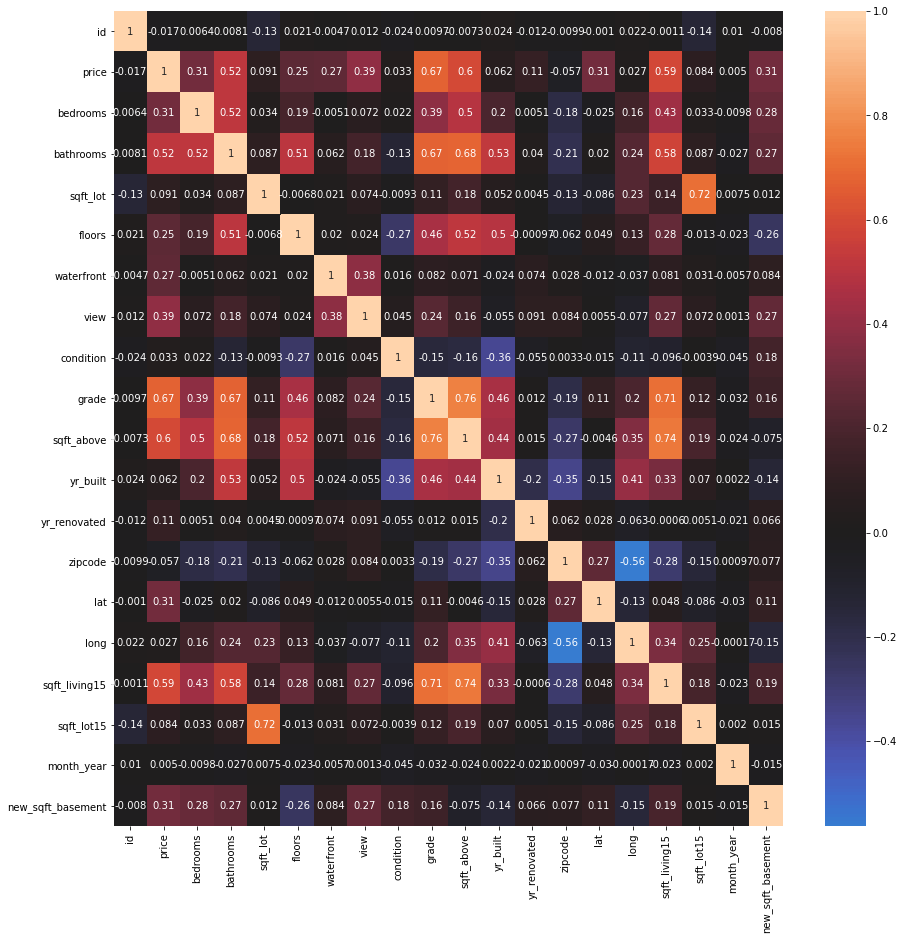

In [216]:
plt.figure(figsize = (15, 15))
sns.heatmap(data = df.corr(), center=0, annot = True)

# Predictive Modeling - Building Model 

In [217]:
#df = df.drop('sqft_basement', axis = 1)
#df = df.drop('month', axis = 1)
#df = df.drop('date', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21263 non-null  float64
 8   condition          21263 non-null  int64  
 9   grade              21263 non-null  int64  
 10  sqft_above         21263 non-null  int64  
 11  yr_built           21263 non-null  int64  
 12  yr_renovated       21263 non-null  float64
 13  zipcode            21263 non-null  int64  
 14  lat                21263 non-null  float64
 15  long               21263 non-null  float64
 16  sqft_living15      212

## Baseline Model

In [218]:
#Dependent variable 
outcome = 'price'
#Independent variables
predictors = df.drop('price', axis = 1)
predictor_variables = '+'.join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [219]:
formula

'price~id+bedrooms+bathrooms+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement'

In [220]:
baseline_model = ols(formula = formula, data = df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2660.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:47:55   Log-Likelihood:            -2.8895e+05
No. Observations:               21263   AIC:                         5.779e+05
Df Residuals:                   21243   BIC:                         5.781e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.972e+07   6.67e+06     -8.953      0.000   -7.28e+07   -4.66e+07
id                -1.467e-06   4.67e-07     -3.145      0.002   -2.38e-06   -5.53e-07
bedrooms          -3.825e+04   2069.073    -18.486      0.000   -4.23e+04   -3.42e+04
bathrooms          4.111e+04   3224.274     12.750      0.000    3.48e+04    4.74e+04
sqft_lot              0.1423      0.046      3.079      0.002       0.052       0.233
floors             8414.8521   3498.399      2.405      0.016    1557.725    1.53e+04
waterfront         6.008e+05   1.77e+04     33.978      0.000    5.66e+05    6.35e+05
view               5.276e+04   2073.717     25.442      0.000    4.87e+04    5.68e+04
condition          2.733e+04   2278.019     11.999      0.000    2.29e+04    3.18e+04
grade              9.659e+04   2104.651     45.895      0.000    9.25e+04    1.01e+05
sqft_above          172.6441      3.634     47.514      0.000     165.522     179.766
yr_built          -2552.5411     70.131    -36.397      0.000   -2690.002   -2415.080
yr_renovated         23.7810      3.884      6.123      0.000      16.168      31.394
zipcode            -575.2778     31.879    -18.045      0.000    -637.764    -512.792
lat                6.004e+05   1.04e+04     57.867      0.000     5.8e+05    6.21e+05
long              -2.065e+05   1.27e+04    -16.266      0.000   -2.31e+05   -1.82e+05
sqft_living15        25.9311      3.371      7.693      0.000      19.325      32.538
sqft_lot15           -0.3925      0.071     -5.516      0.000      -0.532      -0.253
month_year          331.1382     29.934     11.062      0.000     272.465     389.812
new_sqft_basement   146.0804      4.348     33.601      0.000     137.559     154.602
==============================================================================
Omnibus:                    15933.177   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           944645.423
Skew:                           3.062   Prob(JB):                         0.00
Kurtosis:                      35.074   Cond. No.                     2.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Make Observatiosn!!! about baseline model

In [221]:
X = df.drop('price', axis =1)
y = df['price']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [223]:
len(X_train)

15947

In [224]:
len(X_test)

5316

In [225]:
baseline_linreg = LinearRegression()

In [226]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [227]:
y_pred = baseline_linreg.predict(X_test)

In [228]:
residuals = y_pred - y_test

In [229]:
X.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_year',
       'new_sqft_basement'],
      dtype='object')

In [230]:
baseline_linreg.coef_

array([-1.44243989e-06, -3.88005202e+04,  4.09480394e+04,  1.12156493e-01,
        7.83681434e+03,  6.32722371e+05,  5.01154981e+04,  2.70576753e+04,
        9.96543842e+04,  1.72189225e+02, -2.54455635e+03,  2.83918588e+01,
       -5.71048370e+02,  5.93557035e+05, -2.05885418e+05,  2.47798559e+01,
       -3.91153104e-01,  3.46622757e+02,  1.45948461e+02])

In [231]:
mse_train = mean_squared_error (y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error (y_test, y_pred)

print('Train RMSE:', np.sqrt(mse_train))
print('Train RMSE:', np.sqrt(mse_test))

Train RMSE: 193851.71413590503
Train RMSE: 190589.97613898848


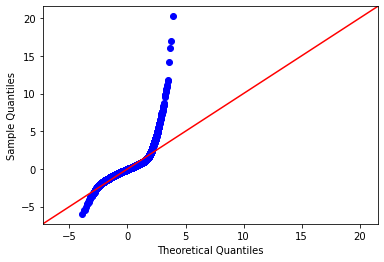

In [232]:
fig = sm.graphics.qqplot(baseline_model.resid, dist = stats.norm, line = '45', fit = True)

In [233]:
df.price.mean()

535420.5864177209

## Model 2 - Dealing with outliers 

dropping condition because it is similar information to grade.

In [234]:
df = df.drop('condition', axis =1)

In [235]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
count,2.126300e+04,2.126300e+04,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.583740e+09,5.354206e+05,3.326012,2.099163,1.505278e+04,1.491911,0.006678,0.228942,7.650849,1776.172365,1971.141419,67.304049,98077.909937,47.559664,-122.213521,1982.070404,12734.246155,201438.866858,283.582138
std,2.877828e+09,3.547799e+05,0.827807,0.749797,4.146123e+04,0.539395,0.081449,0.757166,1.168076,814.804818,29.342651,360.304219,53.509168,0.138839,0.141136,682.020008,27175.744967,44.366989,432.448929
min,1.200019e+06,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,201405.000000,0.000000
25%,2.123700e+09,3.200000e+05,3.000000,1.500000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.469600,-122.328000,1480.000000,5100.000000,201407.000000,0.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,7.600000e+03,1.500000,0.000000,0.000000,7.000000,1550.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000,201410.000000,0.000000
75%,7.325900e+09,6.399665e+05,4.000000,2.500000,1.062300e+04,2.000000,0.000000,0.000000,8.000000,2190.000000,1997.000000,0.000000,98117.000000,47.678150,-122.124000,2360.000000,10078.000000,201502.000000,545.000000
max,9.900000e+09,7.060000e+06,5.000000,6.750000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,8020.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,201505.000000,4820.000000


In [236]:
df_no_outliers = df[df.bathrooms >= 1 ]

In [237]:
df_no_outliers = df_no_outliers[df_no_outliers.price <= 1500000 ]

In [238]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_year,new_sqft_basement
count,2.070400e+04,2.070400e+04,20704.000000,20704.000000,2.070400e+04,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000,20704.000000
mean,4.596222e+09,4.998898e+05,3.313659,2.072317,1.470004e+04,1.485148,0.003236,0.196001,7.596262,1737.827908,1971.128478,63.235848,98078.301391,47.558393,-122.213262,1953.130893,12523.254444,201438.778980,272.515504
std,2.880678e+09,2.469503e+05,0.817711,0.713538,4.007154e+04,0.538306,0.056796,0.688666,1.088779,755.116603,29.244348,349.600462,53.382280,0.139947,0.141642,647.033000,26444.925037,44.332876,414.845640
min,1.200019e+06,7.800000e+04,1.000000,1.000000,5.200000e+02,1.000000,0.000000,0.000000,4.000000,390.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,201405.000000,0.000000
25%,2.125059e+09,3.199375e+05,3.000000,1.500000,5.000000e+03,1.000000,0.000000,0.000000,7.000000,1180.000000,1952.000000,0.000000,98033.000000,47.465100,-122.329000,1480.000000,5075.500000,201407.000000,0.000000
50%,3.905046e+09,4.450000e+05,3.000000,2.250000,7.536000e+03,1.000000,0.000000,0.000000,7.000000,1540.000000,1975.000000,0.000000,98065.000000,47.569100,-122.230000,1820.000000,7560.000000,201410.000000,0.000000
75%,7.338200e+09,6.225000e+05,4.000000,2.500000,1.041450e+04,2.000000,0.000000,0.000000,8.000000,2140.000000,1997.000000,0.000000,98118.000000,47.679000,-122.123000,2320.000000,9964.000000,201502.000000,530.000000
max,9.900000e+09,1.500000e+06,5.000000,6.000000,1.651359e+06,3.500000,1.000000,4.000000,12.000000,7320.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,201505.000000,2810.000000


In [266]:
#Dependent variable 
outcome = 'price'
#Independent variables
predictors = df_no_outliers.drop(['price', 'id'], axis = 1)
predictor_variables = '+'.join(predictors.columns)
formula = outcome + '~' + predictor_variables



In [267]:
formula

'price~bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+sqft_above+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement'

In [240]:
model_2 = ols(formula = formula, data = df_no_outliers).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2955.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:47:57   Log-Likelihood:            -2.7370e+05
No. Observations:               20704   AIC:                         5.474e+05
Df Residuals:                   20686   BIC:                         5.476e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.585e+07   4.65e+06     -9.867      0.000    -5.5e+07   -3.67e+07
bedrooms          -1.305e+04   1468.742     -8.887      0.000   -1.59e+04   -1.02e+04
bathrooms          3.209e+04   2292.533     13.996      0.000    2.76e+04    3.66e+04
sqft_lot              0.1792      0.033      5.407      0.000       0.114       0.244
floors             2.883e+04   2471.906     11.663      0.000     2.4e+04    3.37e+04
waterfront         1.999e+05   1.71e+04     11.661      0.000    1.66e+05    2.33e+05
view               4.011e+04   1516.004     26.458      0.000    3.71e+04    4.31e+04
grade              8.623e+04   1498.485     57.546      0.000    8.33e+04    8.92e+04
sqft_above           87.6780      2.715     32.297      0.000      82.357      92.999
yr_built          -2361.8901     47.208    -50.032      0.000   -2454.421   -2269.359
yr_renovated         12.1787      2.767      4.402      0.000       6.756      17.602
zipcode            -352.5432     22.267    -15.833      0.000    -396.188    -308.898
lat                5.579e+05   7217.272     77.305      0.000    5.44e+05    5.72e+05
long              -9.595e+04   8906.140    -10.773      0.000   -1.13e+05   -7.85e+04
sqft_living15        44.6738      2.476     18.044      0.000      39.821      49.527
sqft_lot15           -0.1569      0.051     -3.092      0.002      -0.256      -0.057
month_year          229.9665     20.953     10.975      0.000     188.896     271.037
new_sqft_basement    90.3913      3.163     28.574      0.000      84.191      96.592
==============================================================================
Omnibus:                     3748.694   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11965.503
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       6.231   Cond. No.                     1.13e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
mse_train = mean_squared_error (y_train, model_2.predict(X_train))
mse_test = mean_squared_error (y_test, y_pred)

print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

Train RMSE: 211039.83584618906
Test RMSE: 190589.97613898848


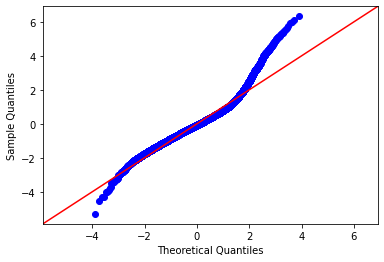

In [242]:
fig = sm.graphics.qqplot(model_2.resid, dist = stats.norm, line = '45', fit = True)

## Model 3 Dealing with dummies 

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21263 non-null  int64  
 1   price              21263 non-null  float64
 2   bedrooms           21263 non-null  int64  
 3   bathrooms          21263 non-null  float64
 4   sqft_lot           21263 non-null  int64  
 5   floors             21263 non-null  float64
 6   waterfront         21263 non-null  float64
 7   view               21263 non-null  float64
 8   grade              21263 non-null  int64  
 9   sqft_above         21263 non-null  int64  
 10  yr_built           21263 non-null  int64  
 11  yr_renovated       21263 non-null  float64
 12  zipcode            21263 non-null  int64  
 13  lat                21263 non-null  float64
 14  long               21263 non-null  float64
 15  sqft_living15      21263 non-null  int64  
 16  sqft_lot15         212

In [244]:
waterfront_dummies = pd.get_dummies(df_no_outliers['waterfront'], prefix = 'waterfront', drop_first = True)

In [245]:
view_dummies = pd.get_dummies(df_no_outliers['view'], prefix = 'view', drop_first = True)

In [246]:
grade_dummies = pd.get_dummies(df_no_outliers['grade'],prefix = 'grade', drop_first = True)

In [247]:
zip_dummies = pd.get_dummies(df_no_outliers['zipcode'], prefix = 'zip', drop_first = True)

In [248]:
df_cat = pd.concat([df_no_outliers, wf_dummies, view_dummies, grade_dummies, zip_dummies], axis = 1 )

In [249]:
df_cat.head()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_above,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,221900.0,3,1.00,5650,1.0,0.0,0.0,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,7242,2.0,0.0,0.0,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,10000,1.0,0.0,0.0,6,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,5000,1.0,0.0,0.0,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,8080,1.0,0.0,0.0,8,1680,...,0,0,0,0,0,0,0,0,0,0


In [250]:
df_cat.drop(columns = ['id', 'waterfront', 'view', 'zipcode', 'grade'], inplace = True)

In [251]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20704 entries, 0 to 21595
Data columns (total 96 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20704 non-null  float64
 1   bedrooms           20704 non-null  int64  
 2   bathrooms          20704 non-null  float64
 3   sqft_lot           20704 non-null  int64  
 4   floors             20704 non-null  float64
 5   sqft_above         20704 non-null  int64  
 6   yr_built           20704 non-null  int64  
 7   yr_renovated       20704 non-null  float64
 8   lat                20704 non-null  float64
 9   long               20704 non-null  float64
 10  sqft_living15      20704 non-null  int64  
 11  sqft_lot15         20704 non-null  int64  
 12  month_year         20704 non-null  int32  
 13  new_sqft_basement  20704 non-null  int64  
 14  wf_1.0             20704 non-null  uint8  
 15  view_1.0           20704 non-null  uint8  
 16  view_2.0           207

In [252]:
df_cat.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_year', 'new_sqft_basement', 'waterfront_1', 'view_1',
       'view_2', 'view_3', 'view_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'zip_98002',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042',
       'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108',
       'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117',
       'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126',
       'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148',
       'zip_98155', 'zip_98166', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199']

In [253]:
df_cat.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_year', 'new_sqft_basement', 'waterfront_1',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'zip_98002',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042',
       'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip

In [269]:
#Dependent variable 
outcome = 'price'
#Independent variables
predictors = df_cat.drop(['price'], axis = 1)
predictor_variables = '+'.join(predictors.columns)
formula = outcome + '~' + predictor_variables



In [270]:
formula

'price~bedrooms+bathrooms+sqft_lot+floors+sqft_above+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement+waterfront_1+view_1+view_2+view_3+view_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+zip_98148+zip_98155+zip_98166+zip_98168+zip_98177+zip_98178+zip_98188+zip_98198+zip_98199'

In [262]:
df_cat.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_year', 'new_sqft_basement', 'waterfront_1',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'zip_98002',
       'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042',
       'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip

In [263]:
model_3 = ols(formula = formula, data = df_cat).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1142.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:50:00   Log-Likelihood:            -2.6746e+05
No. Observations:               20704   AIC:                         5.351e+05
Df Residuals:                   20608   BIC:                         5.359e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.463e+07      5e+06    -12.917      0.000   -7.44e+07   -5.48e+07
bedrooms          -1394.3760   1124.664     -1.240      0.215   -3598.806     810.054
bathrooms          2.364e+04   1720.641     13.736      0.000    2.03e+04     2.7e+04
sqft_lot              0.2423      0.025      9.812      0.000       0.194       0.291
floors            -2.175e+04   2041.188    -10.655      0.000   -2.57e+04   -1.77e+04
sqft_above          119.0222      2.117     56.231      0.000     114.873     123.171
yr_built           -702.9246     39.458    -17.815      0.000    -780.265    -625.584
yr_renovated         15.3771      2.064      7.450      0.000      11.331      19.423
lat                1.024e+05   3.98e+04      2.572      0.010    2.44e+04     1.8e+05
long              -9.631e+04   2.92e+04     -3.303      0.001   -1.53e+05   -3.92e+04
sqft_living15        25.0284      1.936     12.926      0.000      21.233      28.824
sqft_lot15            0.0176      0.039      0.454      0.650      -0.059       0.094
month_year          244.9422     15.568     15.734      0.000     214.428     275.456
new_sqft_basement    79.4837      2.375     33.473      0.000      74.829      84.138
waterfront_1        2.34e+05    1.4e+04     16.659      0.000    2.06e+05    2.61e+05
view_1             6.737e+04   5953.164     11.316      0.000    5.57e+04     7.9e+04
view_2             6.733e+04   3601.982     18.693      0.000    6.03e+04    7.44e+04
view_3             1.212e+05   5083.455     23.842      0.000    1.11e+05    1.31e+05
view_4             1.939e+05   8378.098     23.148      0.000    1.78e+05     2.1e+05
grade_5            1.246e+04   2.73e+04      0.456      0.648   -4.11e+04     6.6e+04
grade_6            2.179e+04   2.66e+04      0.818      0.413   -3.04e+04     7.4e+04
grade_7            4.494e+04   2.66e+04      1.689      0.091   -7213.433    9.71e+04
grade_8            8.591e+04   2.67e+04      3.219      0.001    3.36e+04    1.38e+05
grade_9            1.678e+05   2.69e+04      6.248      0.000    1.15e+05     2.2e+05
grade_10           2.386e+05   2.71e+04      8.808      0.000    1.85e+05    2.92e+05
grade_11           3.343e+05   2.78e+04     12.022      0.000     2.8e+05    3.89e+05
grade_12           4.009e+05   3.43e+04     11.680      0.000    3.34e+05    4.68e+05
zip_98002          2.199e+04   9056.241      2.428      0.015    4235.456    3.97e+04
zip_98003         -8935.8967   8013.178     -1.115      0.265   -2.46e+04    6770.566
zip_98004          5.664e+05   1.51e+04     37.447      0.000    5.37e+05    5.96e+05
zip_98005          3.041e+05   1.58e+04     19.299      0.000    2.73e+05    3.35e+05
zip_98006           2.62e+05   1.29e+04     20.257      0.000    2.37e+05    2.87e+05
zip_98007          2.398e+05   1.63e+04     14.687      0.000    2.08e+05

In [264]:
ff = df.loc[df['new_sqft_basement'] > 1]
f = ff['new_sqft_basement'].mean()
print('Mean of basement AREA is ' + str(f))

print('cost add for basement ' + str(int(f) * 79.4837))


Mean of basement AREA is 730.2660772677727
cost add for basement 58023.101


In [265]:
mse_train = mean_squared_error (y_train, model_3.predict(X_train))
mse_test = mean_squared_error (y_test, y_pred)

print('Train RMSE:', np.sqrt(mse_train))
print('Train RMSE:', np.sqrt(mse_test))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'waterfront_1' is not defined
    price~bedrooms+bathrooms+sqft_lot+floors+sqft_above+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement+waterfront_1+view_1+view_2+view_3+view_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+zip_98148+zip_98155+zip_98166+zip_98168+zip_98177+zip_98178+zip_98188+zip_98198+zip_98199
                                                                                                                                             ^^^^^^^^^^^^

In [144]:
fig = sm.graphics.qqplot(test.resid, dist = stats.norm, line = '45', fit = True)

AttributeError: 'LinearRegression' object has no attribute 'resid'

## Model 5 - Log transformation 

In [271]:
df_columns = df.columns
df_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month_year',
       'new_sqft_basement']

C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

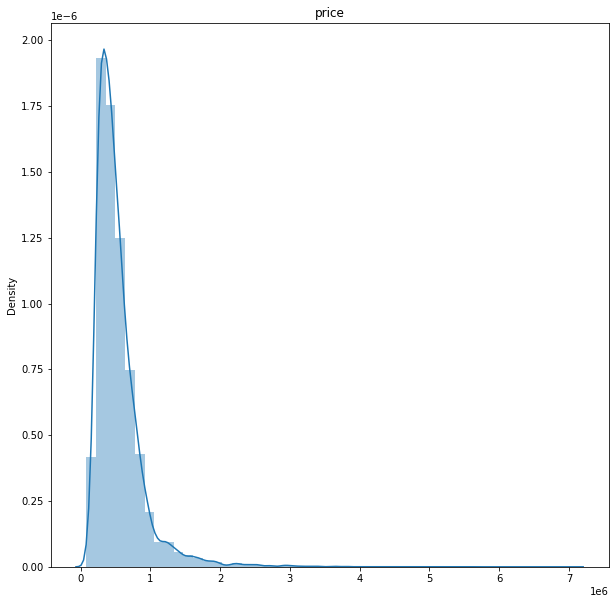

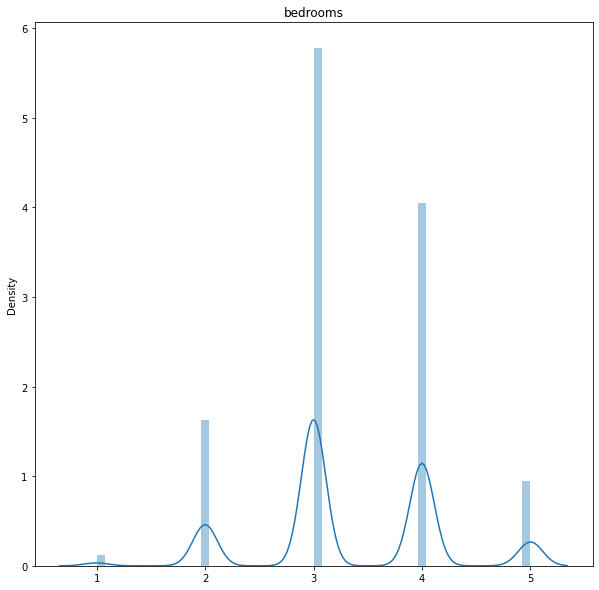

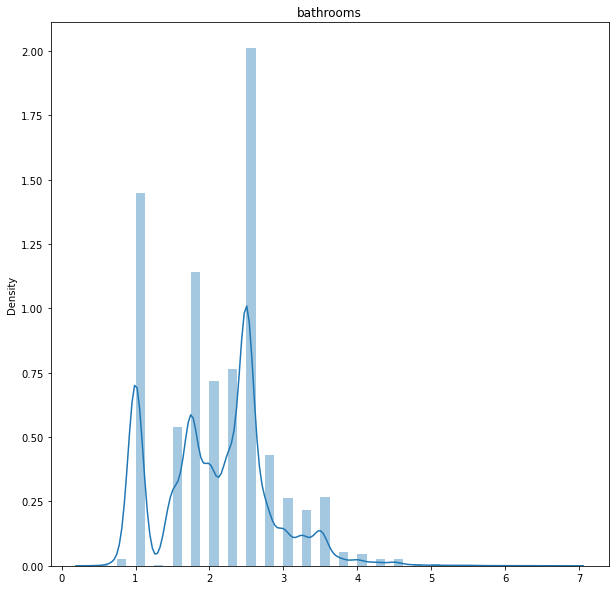

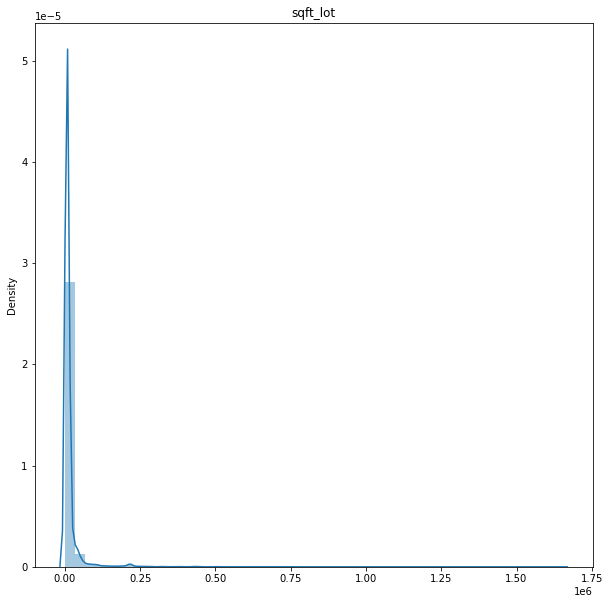

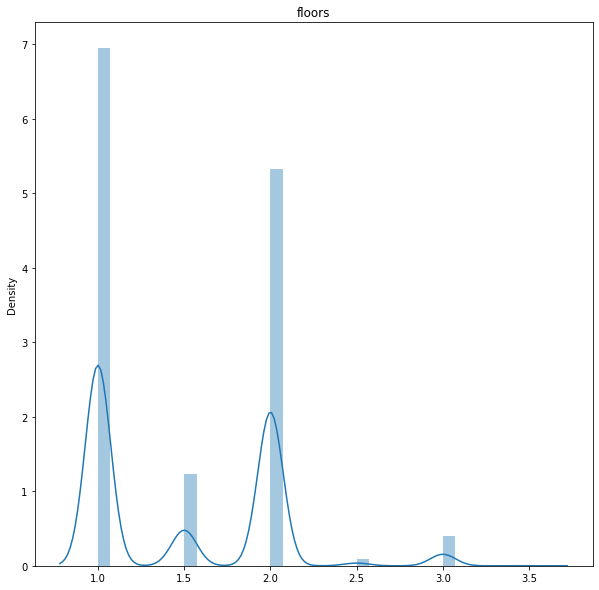

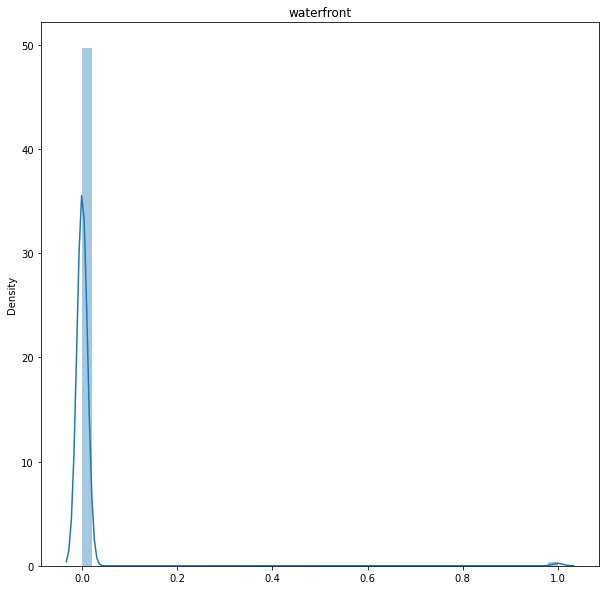

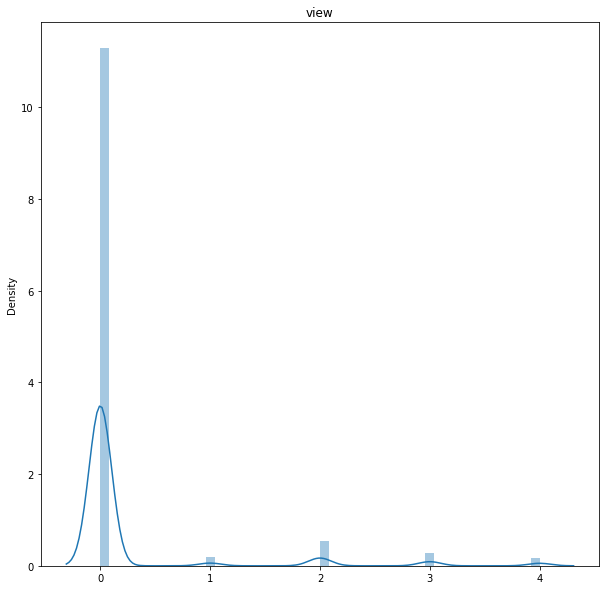

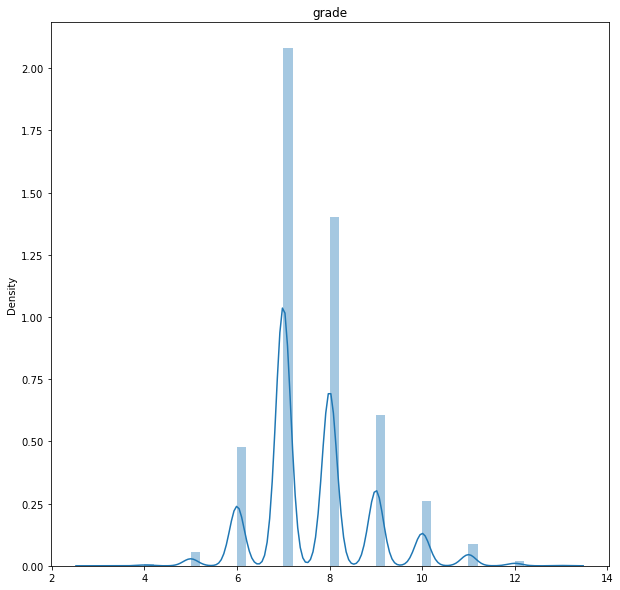

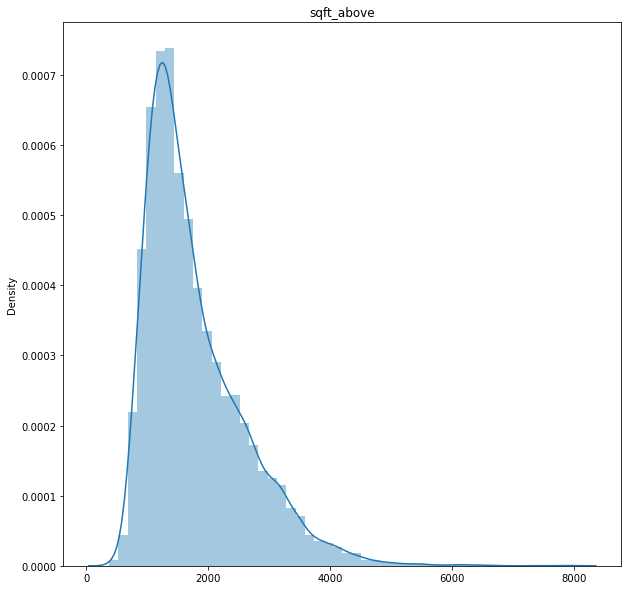

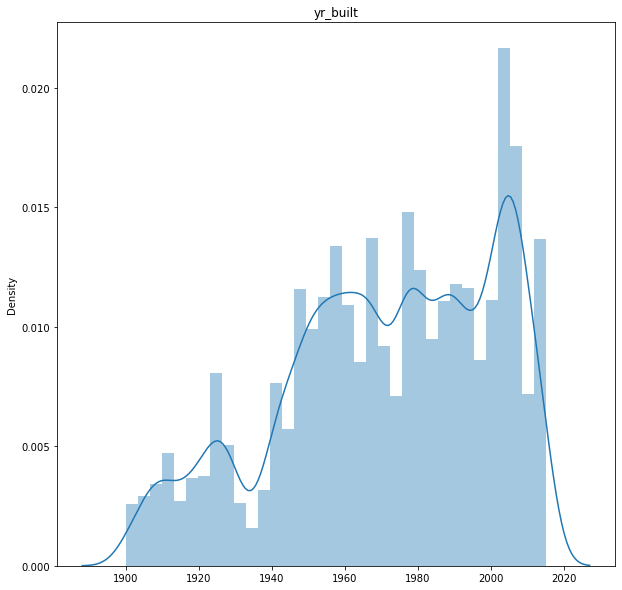

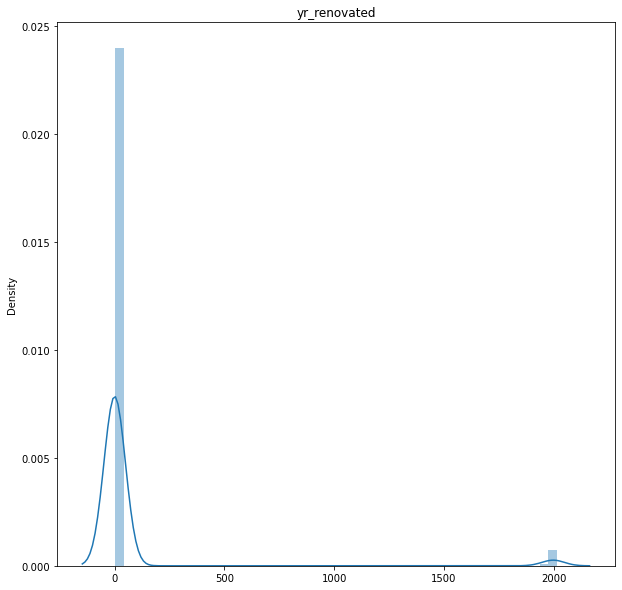

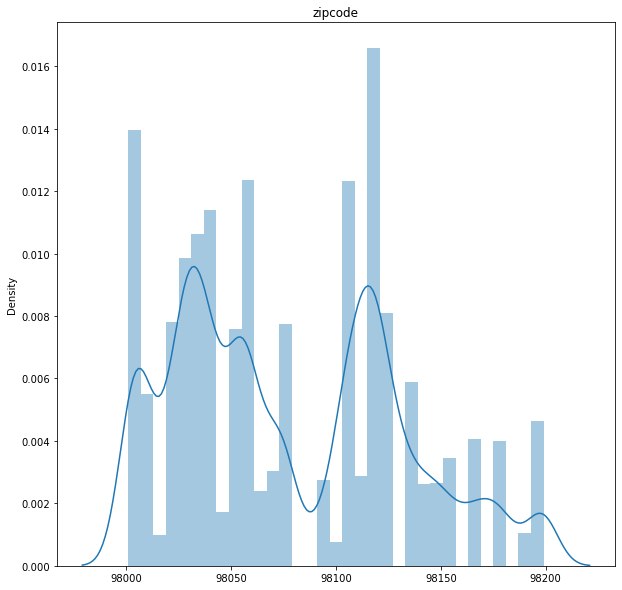

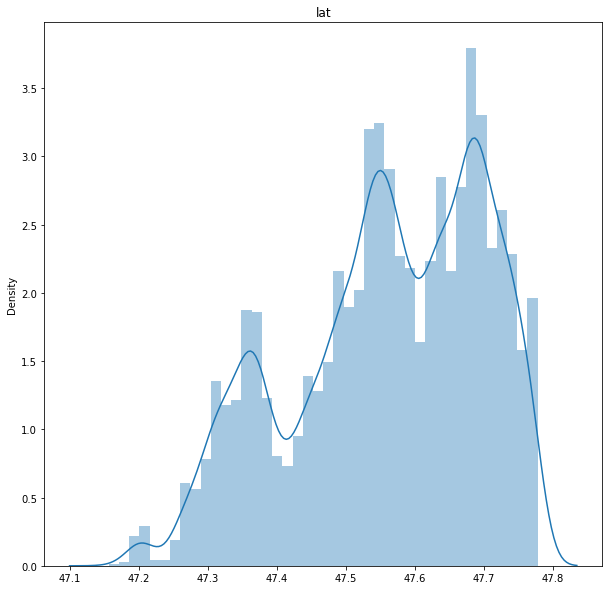

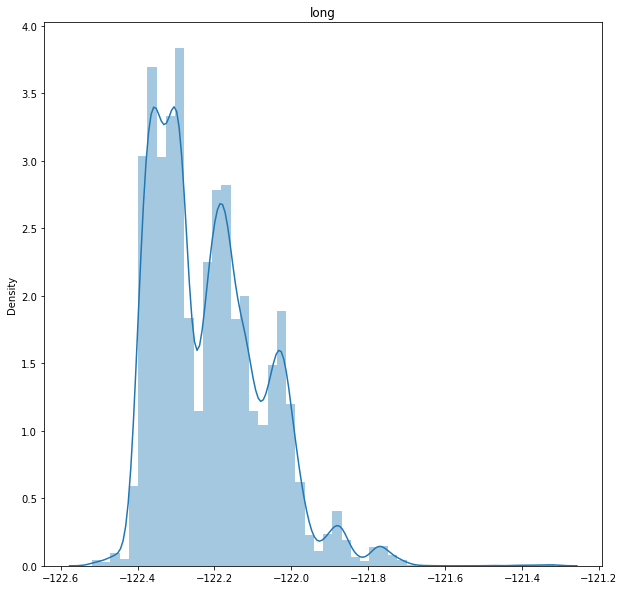

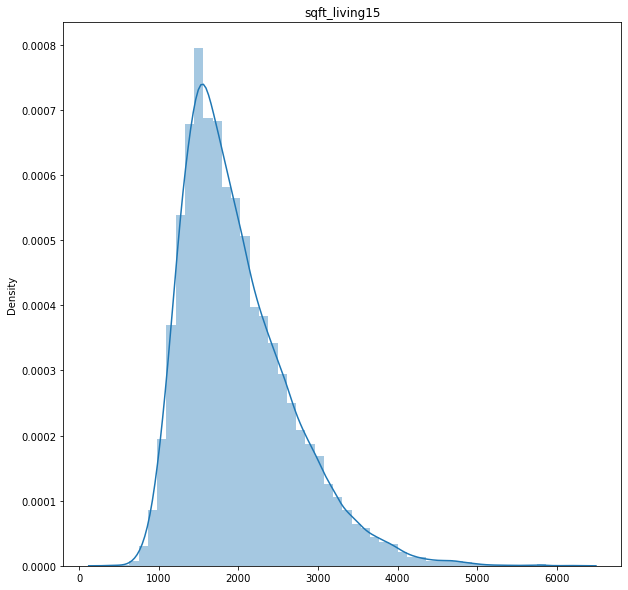

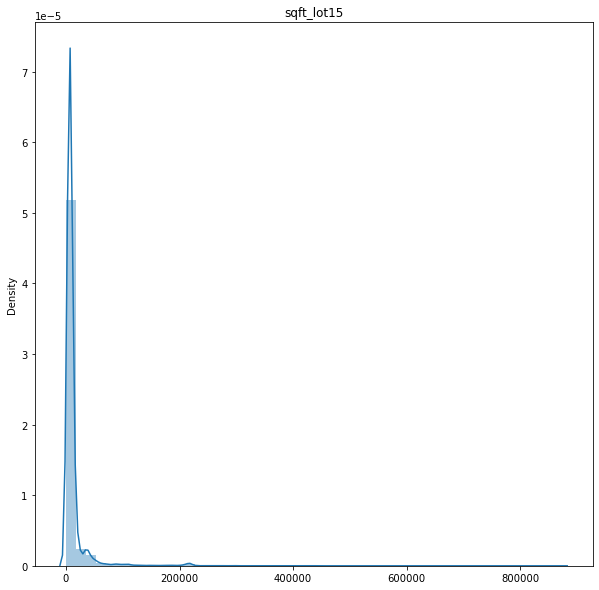

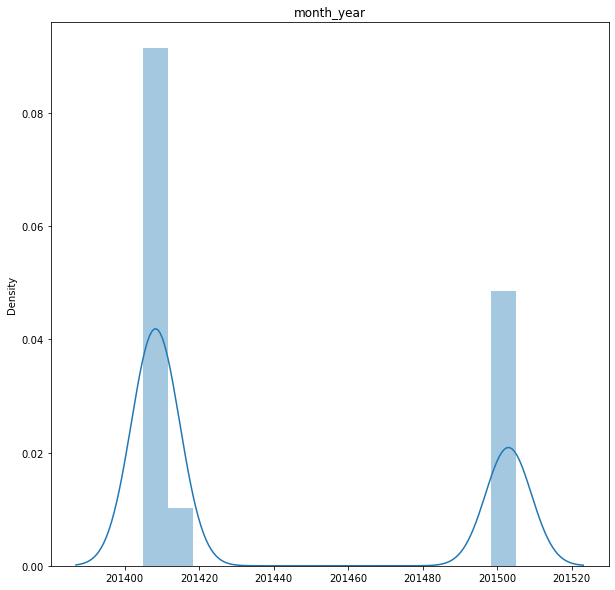

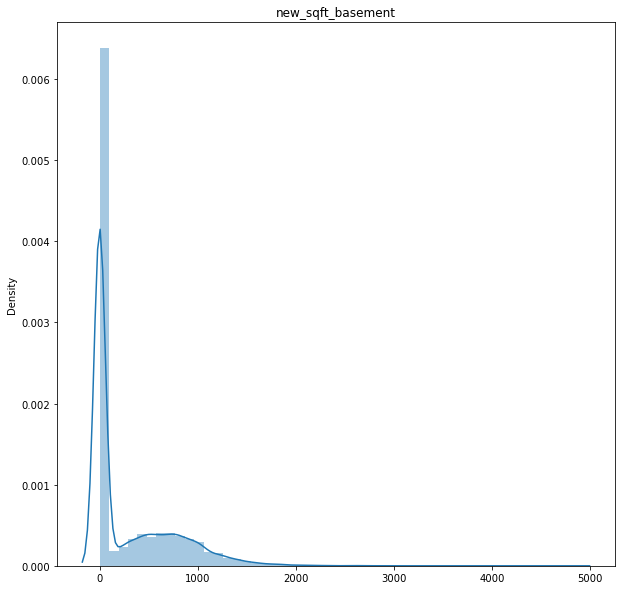

In [272]:
for i in df_columns:
    figure, ax= plt.subplots(figsize = (10,10))
    sns.distplot(df, x = df[i])
    plt.title(i)
    

from the above graphs the following columns will have log transformations: sqft_lot, sqft_above, sqft_living15, sqft_lot15

In [273]:
df_no_outliers['sqft_lot_log'] = np.log(df_no_outliers['sqft_lot'])
df_no_outliers['sqft_above_log'] = np.log(df_no_outliers['sqft_above'])
df_no_outliers['sqft_living15_log'] = np.log(df_no_outliers['sqft_living15'])
df_no_outliers['sqft_lot15_log'] = np.log(df_no_outliers['sqft_lot15'])

C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

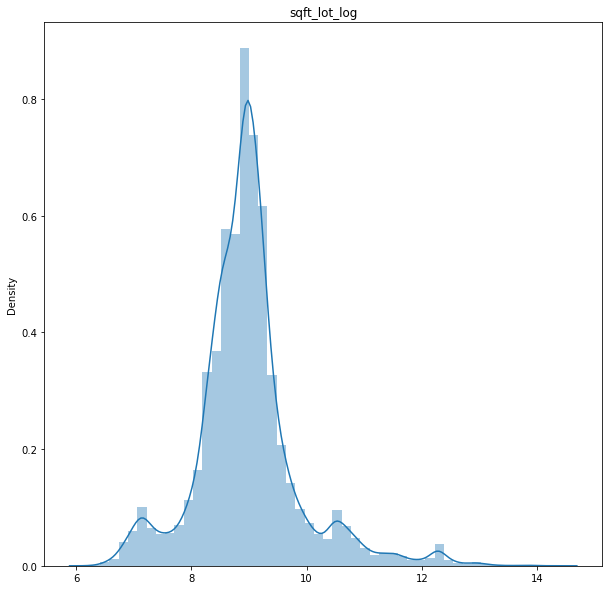

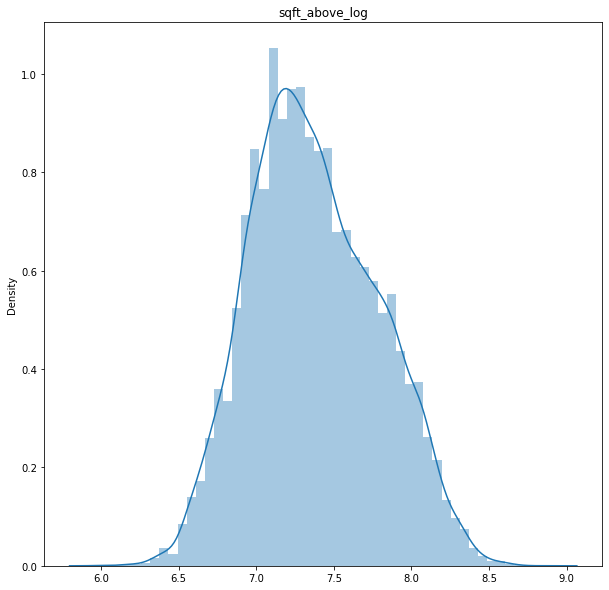

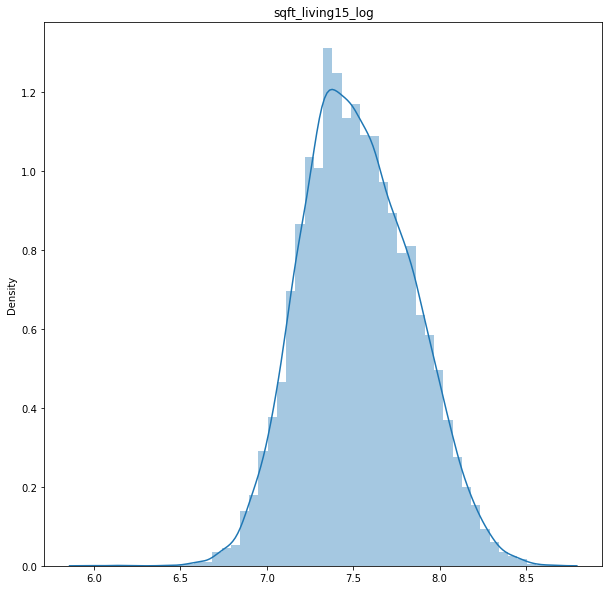

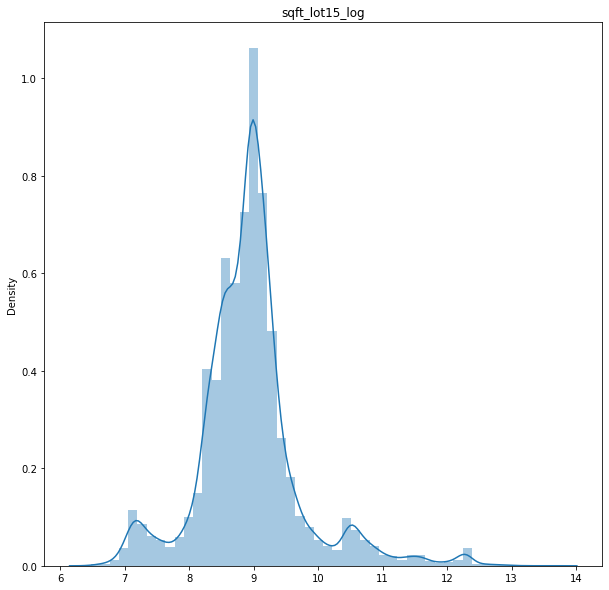

In [274]:
log_columns = ['sqft_lot_log', 'sqft_above_log', 'sqft_living15_log', 'sqft_lot15_log']
for i in log_columns:
    figure, ax= plt.subplots(figsize = (10,10))
    sns.distplot(df, x = df_no_outliers[i])
    plt.title(i)

In [276]:
#Dependent variable 
outcome = 'price'
#Independent variables
predictors = df_no_outliers.drop(['price', 'id'], axis = 1)
predictor_variables = '+'.join(predictors.columns)
formula = outcome + '~' + predictor_variables



In [277]:
formula

'price~bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+sqft_above+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement+sqft_lot_log+sqft_above_log+sqft_living15_log+sqft_lot15_log'

In [278]:
model_5 = ols(formula = formula, data = df_no_outliers).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2444.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:57:46   Log-Likelihood:            -2.7354e+05
No. Observations:               20704   AIC:                         5.471e+05
Df Residuals:                   20682   BIC:                         5.473e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -3.71e+07   4.65e+06     -7.984      0.000   -4.62e+07    -2.8e+07
bedrooms          -1.002e+04   1501.000     -6.673      0.000    -1.3e+04   -7073.604
bathrooms          2.966e+04   2301.600     12.885      0.000    2.51e+04    3.42e+04
sqft_lot              0.2937      0.039      7.443      0.000       0.216       0.371
floors             8222.3394   2807.416      2.929      0.003    2719.583    1.37e+04
waterfront         2.256e+05   1.71e+04     13.215      0.000    1.92e+05    2.59e+05
view               4.014e+04   1509.004     26.602      0.000    3.72e+04    4.31e+04
grade              8.521e+04   1493.737     57.046      0.000    8.23e+04    8.81e+04
sqft_above           99.3024      6.129     16.203      0.000      87.290     111.315
yr_built          -2411.7094     47.123    -51.179      0.000   -2504.075   -2319.344
yr_renovated         13.2034      2.749      4.804      0.000       7.816      18.591
zipcode            -384.4474     22.271    -17.262      0.000    -428.100    -340.795
lat                5.471e+05   7200.628     75.974      0.000    5.33e+05    5.61e+05
long               -7.01e+04   8994.424     -7.794      0.000   -8.77e+04   -5.25e+04
sqft_living15        87.6733      8.410     10.425      0.000      71.189     104.158
sqft_lot15            0.3625      0.065      5.546      0.000       0.234       0.491
month_year          224.9249     20.799     10.814      0.000     184.157     265.693
new_sqft_basement    90.5068      3.147     28.759      0.000      84.338      96.675
sqft_lot_log      -1.021e+04   3274.865     -3.118      0.002   -1.66e+04   -3791.837
sqft_above_log    -3633.0193   1.12e+04     -0.325      0.745   -2.55e+04    1.83e+04
sqft_living15_log -7.462e+04   1.63e+04     -4.566      0.000   -1.07e+05   -4.26e+04
sqft_lot15_log    -2.571e+04   3663.653     -7.017      0.000   -3.29e+04   -1.85e+04
==============================================================================
Omnibus:                     4006.615   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13551.892
Skew:                           0.969   Prob(JB):                         0.00
Kurtosis:                       6.457   Cond. No.                     1.14e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
mse_train = mean_squared_error (y_train, model_5.predict(X_train))
mse_test = mean_squared_error (y_test, y_pred)

print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'sqft_lot_log' is not defined
    price~bedrooms+bathrooms+sqft_lot+floors+waterfront+view+grade+sqft_above+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+month_year+new_sqft_basement+sqft_lot_log+sqft_above_log+sqft_living15_log+sqft_lot15_log
                                                                                                                                                                           ^^^^^^^^^^^^

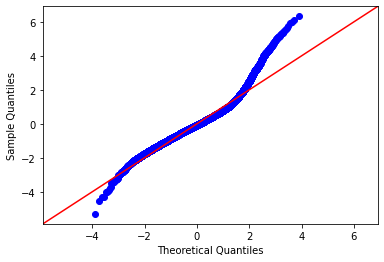

In [242]:
fig = sm.graphics.qqplot(model_2.resid, dist = stats.norm, line = '45', fit = True)